###Μηχανική Μάθηση 
####1η ατομική εργασία 
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2022-23



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Αναστασία Χριστίνα Λίβα

Α.Μ.: 03119029

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1-L7QQEfLWCsqiBClxUlg4yzquf1G_Ga-/view?usp=sharing) και για το testing από [εδώ](https://drive.google.com/file/d/1-6l-NL3wwKGKJpVjxjUrOdFbcnKo-PwW/view?usp=sharing).



Φορτώνω τα δεδομένα μου μέσω google drive 

1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [ ]:
import pandas as pd

url='https://drive.google.com/file/d/1agRxgpPZGXwB4ZkZVjNWWyuitFkgI2pL/view?usp=sharing'
file_id=url.split('/')[-2]

dwn_url='https://drive.google.com/uc?id=' + file_id


data_train = pd.read_csv(dwn_url)

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [ ]:

url='https://drive.google.com/file/d/1A7nQiWHYCuPLHnrtUeBUdP1EgomZAE3A/view?usp=sharing'
file_id=url.split('/')[-2]

dwn_url='https://drive.google.com/uc?id=' + file_id


data_test = pd.read_csv(dwn_url)

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων, 

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [ ]:

#count
data_train.shape







(48423, 24)

In [ ]:
#characteristics
data_train.info

<bound method DataFrame.info of           id        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0          1  2009-03-04   Albury     13.8     22.1       0.2          NaN   
1          2  2009-03-05   Albury     11.5     22.0       0.0          NaN   
2          3  2009-03-09   Albury     13.8     31.8       0.0          NaN   
3          4  2009-03-10   Albury     15.5     32.0       0.0          NaN   
4          5  2009-03-11   Albury     18.4     30.5       1.2          NaN   
...      ...         ...      ...      ...      ...       ...          ...   
48418  48419  2017-06-12    Uluru      5.1     19.7       0.0          NaN   
48419  48420  2017-06-16    Uluru      5.2     24.3       0.0          NaN   
48420  48421  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
48421  48422  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
48422  48423  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

       Sunshine WindGustDir  Wi

In [ ]:
#labels
data_train.columns.values

array(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [ ]:
len(data_train['RainTomorrow'].unique())

2

In [ ]:
data_train.groupby(['RainTomorrow']).size()

RainTomorrow
0.0    37364
1.0    11059
dtype: int64

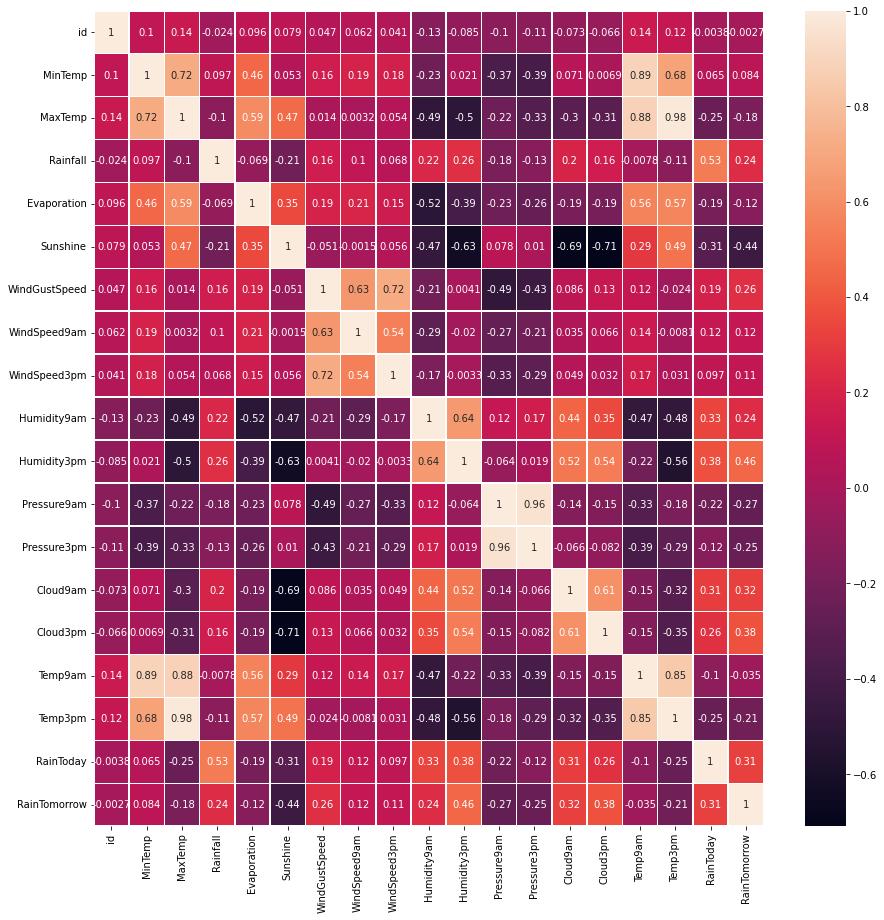

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = data_train.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας; 


Στον correlation πίνακα παρατηρώ ότι τα ζεύγη temp3pm-maxtemp, temp9am-mintemp, pressure 3pm-pressure9am παρουσιάζουν πολύ υψηλό correlation, οπότε μπορώ να αγνοήσω ένα μέλος κάθε ζεύγους. Επίσης παρατηρώ ότι τα πεδία Evaporation, sunshine έχουν πολλές null τιμές, οπότε μάλλον δε θα είναι βοηθητικά. Επίσης, δε χρησιμοποιώ το rainfall καθώς γνωρίζω ήδη από το rain today εάν βρέχει, ενώ το id είναι άσχετη πληροφορία.
Επίσης μετατρέπω τις κατευθύνσεις του ανέμου σε μοίρες


In [ ]:
data_train.drop(['Temp9am'], axis=1, inplace=True)
data_train.drop(['Temp3pm'], axis=1, inplace=True)
data_train.drop(['Pressure3pm'], axis=1, inplace=True)
data_train.drop(['id'], axis=1, inplace=True)
data_train.drop(['Sunshine'], axis=1, inplace=True)
data_train.drop(['Evaporation'], axis=1, inplace=True)
data_train.drop(['Rainfall'], axis=1, inplace=True)
data_train['Date'] = pd.to_datetime(data_train['Date'], errors ='coerce')
data_train['Date'] = (data_train['Date'].dt.isocalendar().week).astype(str)

dataframeid=data_test[['id']]
data_test.drop(['Temp9am'], axis=1, inplace=True)
data_test.drop(['Temp3pm'], axis=1, inplace=True)
data_test.drop(['Pressure3pm'], axis=1, inplace=True)
data_test.drop(['id'], axis=1, inplace=True)
data_test.drop(['Sunshine'], axis=1, inplace=True)
data_test.drop(['Evaporation'], axis=1, inplace=True)
data_test.drop(['Rainfall'], axis=1, inplace=True)
data_test['Date'] = pd.to_datetime(data_test['Date'], errors ='coerce')
data_test['Date'] = (data_test['Date'].dt.isocalendar().week).astype(str)


data_train['WindDir3pm'] = data_train['WindDir3pm'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
data_train['WindDir9am'] = data_train['WindDir9am'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
data_train['WindGustDir'] = data_train['WindGustDir'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])

data_test['WindDir3pm'] = data_test['WindDir3pm'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
data_test['WindDir9am'] = data_test['WindDir9am'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
data_test['WindGustDir'] = data_test['WindGustDir'].replace(['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W','WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
print(data_train)

      Date Location  MinTemp  MaxTemp  WindGustDir  WindGustSpeed  WindDir9am  \
0       10   Albury     13.8     22.1        292.5           57.0       270.0   
1       10   Albury     11.5     22.0        225.0           50.0       247.5   
2       11   Albury     13.8     31.8         22.5           24.0       157.5   
3       11   Albury     15.5     32.0         45.0           50.0       112.5   
4       11   Albury     18.4     30.5         45.0           44.0        45.0   
...    ...      ...      ...      ...          ...            ...         ...   
48418   24    Uluru      5.1     19.7         90.0           46.0       112.5   
48419   24    Uluru      5.2     24.3         90.0           24.0       135.0   
48420   25    Uluru      3.5     21.8         90.0           31.0       112.5   
48421   25    Uluru      5.4     26.9          0.0           37.0       135.0   
48422   25    Uluru      7.8     27.0        135.0           28.0       157.5   

       WindDir3pm  WindSpee

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

Τις απουσιάζουσες τιμές των εναπομείναντων πεδίων επιλέγω να τις συμπληρώσω έναν μέσο όρο 12 ημερών για την ίδια πόλη, καθώς ο καιρός αποτελεί ένα σχετικά σταθερό φαινόμενο από εποχή σε εποχή.

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler

numeric_features = [2,3,4,5,6,7,8,9,10,11, 12,13, 14]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())]) 

df_num = data_train[data_train.columns[~data_train.columns.isin([ 'RainToday', 'RainTomorrow'])]]

df_num=df_num.to_numpy()
df_cat = data_train[[ 'RainToday', 'RainTomorrow']]

df_num_test = data_test[data_test.columns[~data_test.columns.isin([ 'RainToday'])]]
df_num_test=df_num_test.to_numpy()
df_cat_test = data_test[[ 'RainToday']]

for i in range(15):
  if(i!=0 and i!=1):
    for j in range(48423):
      l = float(df_num[j][i])
      if np.isnan(l):
        loc = df_num[j][1]
        sum = 0
        count = 0
        for k in [-5,-4, -3,-2,-1,1,2,3, 4, 5]:
          if(j+k>48422 or j+k<0):
            continue
          if(df_num[j+k][1] == loc and (not np.isnan(df_num[j+k][i]))):
            sum = sum + df_num[j+k][i]
            count = count + 1
        if(count!=0):
          avg = sum/count
        if(avg!=0):  
          df_num[j][i] = avg 


for i in range(15):
  if(i!=0 and i!=1):
    for j in range(9679):
      l = float(df_num_test[j][i])
      if np.isnan(l):
        loc = df_num_test[j][1]
        sum = 0
        count = 0
        for k in [-6 ,-5,-4, -3,-2,-1,1,2,3, 4, 5, 6]:
          if(j+k>9678 or j+k<0):
            continue
          if(df_num_test[j+k][1] == loc and (not np.isnan(df_num_test[j+k][i]))):
            sum = sum + df_num_test[j+k][i]
            count = count + 1
        if(count!=0):
          avg = sum/count
        if(avg!=0):  
          df_num_test[j][i] = avg 

df_num = pd.DataFrame(df_num)
df_cat.rename(columns={ "RainToday":15, "RainTomorrow":16}, inplace=True)

df_non_null = df_num.join(df_cat)
data_train=df_non_null



df_num_test = pd.DataFrame(df_num_test)
df_cat_test.rename(columns={ "RainToday":15}, inplace=True)

df_non_null_test = df_num_test.join(df_cat_test)
data_test=df_non_null_test


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

Φτιάχνω τους κατηγορικούς και αριθμητικούς ΜΣ.
ο Αριθμητικός βρίσκεται στο από πάνω block κωδικα

In [ ]:


categorical_features = [0,1]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])
    

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

Μέσω των ΜΣ συμοληρώνω όσες null τιμές έχουν απομείνει και μετατρέπω τα κατηγορικά στοιχεία σε στοιχεία αναγνωρίσιμα από τους αλγορίθμους Μηχανικής Μάθησης

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[(
        'cat', categorical_transformer, categorical_features)
        ,('num', numeric_transformer, numeric_features)], remainder='passthrough')
print(data_train)


       0       1     2     3      4     5      6      7     8     9     10  \
0      10  Albury  13.8  22.1  292.5  57.0  270.0  292.5  26.0  33.0  57.0   
1      10  Albury  11.5  22.0  225.0  50.0  247.5  270.0  19.0  33.0  60.0   
2      11  Albury  13.8  31.8   22.5  24.0  157.5   45.0   6.0  17.0  49.0   
3      11  Albury  15.5  32.0   45.0  50.0  112.5   90.0   2.0   4.0  51.0   
4      11  Albury  18.4  30.5   45.0  44.0   45.0    0.0  15.0  19.0  57.0   
...    ..     ...   ...   ...    ...   ...    ...    ...   ...   ...   ...   
48418  24   Uluru   5.1  19.7   90.0  46.0  112.5   90.0  13.0  17.0  56.0   
48419  24   Uluru   5.2  24.3   90.0  24.0  135.0   90.0  11.0  11.0  53.0   
48420  25   Uluru   3.5  21.8   90.0  31.0  112.5   90.0  15.0  13.0  59.0   
48421  25   Uluru   5.4  26.9    0.0  37.0  135.0  292.5   9.0   9.0  53.0   
48422  25   Uluru   7.8  27.0  135.0  28.0  157.5    0.0  13.0   7.0  51.0   

         11      12        13        14   15   16  
0      26.0

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [ ]:
data_train=pd.DataFrame(preprocessor.fit_transform(data_train).toarray())
print(data_train)

data_test=pd.DataFrame(preprocessor.fit_transform(data_test).toarray())
      


       0    1    2    3    4    5    6    7    8    9    ...       95   \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.135823   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.916129   
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.280812   
3      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.841424   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.720200   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
48418  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.841424   
48419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.841424   
48420  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.841424   
48421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.135823   
48422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.720200   

            96        97        98        99        100         101       102  \
0      1.379867  1.663360 -0.7

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.` 



Αφαιρώ την τελευταία στήλη raintomorrow καθώς αυτή θέλω να προβλέψω και στη συνέχεια χωρίζω τα δεδομένα μου σε 70% train και 30% test.

In [ ]:
from sklearn.model_selection import train_test_split
#X=data_train[data_train.columns[~data_train.columns.isin([116])]]
#y=data_train[116]
X=data_train.iloc[:,:-1]
print(X)
y=data_train.iloc[:,-1]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

       0    1    2    3    4    5    6    7    8    9    ...       94   \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.973783   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.758274   
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.103759   
3      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.534776   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.181301   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
48418  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.534776   
48419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.319268   
48420  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.534776   
48421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.319268   
48422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.103759   

            95        96        97        98        99        100         101  \
0      1.135823  1.379867  1.6

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [ ]:
#έγινε στο προηγούμενο block κώδικα

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας: 
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

Στα αξόλουθα block φτιαχνω τους ταξινομητες μου

In [ ]:
#Naive Bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)


GaussianNB()

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifier:
knn = KNeighborsClassifier() 

# Train the classifier:
knn.fit(X_train, y_train) 




KNeighborsClassifier()

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
print(X_train)
print(y_train)


       0    1    2    3    4    5    6    7    8    9    ...       94   \
1197   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.396810   
35300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.319268   
7769   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -1.181301   
36279  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.103759   
15501  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.534776   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
11284  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.189291   
44732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.192191   
38158  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.319268   
860    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.189291   
15795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.620308   

            95        96        97        98        99        100       101  \
1197  -1.720200 -0.298988  0.873

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
mlppr=clf.fit(X_train, y_train)
 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#SVC
from sklearn.svm import SVC
clfsvc=SVC()
clfsvc.fit(X_train, y_train)


SVC()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
randomforest_clf = RandomForestClassifier()

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


Τωρα κανω predict

In [ ]:
#naive bayes
nbayespr = nbc.predict(X_test)
mislabel = np.sum((y_test!=nbayespr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 5511


In [ ]:
#knn
# Make predictions with the classifier:
knnpr = knn.predict(X_test)

print("Labels' prediction ",knnpr)

print("Labels from test set",y_test)
mislabel = np.sum((y_test!=knnpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Labels' prediction  [0. 1. 1. ... 0. 0. 0.]
Labels from test set 26834    0.0
4280     1.0
32228    1.0
46210    0.0
34892    1.0
        ... 
36715    1.0
24586    0.0
41744    0.0
1904     0.0
11635    1.0
Name: 104, Length: 14527, dtype: float64
Total number of mislabelled data points from 14527 test samples is 2310


In [ ]:
logregpr = logisticRegr.predict(X_test)
mislabel = np.sum((y_test!=logregpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2218


In [ ]:
#mlp
 
mlppr=clf.predict(X_test)
mislabel = np.sum((y_test!=mlppr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2384


In [ ]:
#svc
svcpr=clfsvc.predict(X_test)
mislabel = np.sum((y_test!=svcpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2032


In [ ]:
#decision tree
tree_clf_fit=tree_clf.fit(X_train, y_train)
dtreepr=tree_clf.predict(X_test)
mislabel = np.sum((y_test!=dtreepr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 3047


In [ ]:
#random forest
randomforest_clf.fit(X_train, y_train)
rforpr=randomforest_clf.predict(X_test)
mislabel = np.sum((y_test!=rforpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))


Total number of mislabelled data points from 14527 test samples is 2102



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:
from sklearn.metrics import f1_score
#naive bayes
print("Naive Bayes: ", f1_score(y_test, nbayespr, average='weighted'))
print("KNN: ", f1_score( y_test, knnpr, average='weighted'))
print("logreg: ", f1_score( y_test, logregpr, average='weighted'))
print("MLP: ", f1_score( y_test, mlppr, average='weighted'))
print("SVC ", f1_score( y_test, svcpr,  average='weighted'))
print("Decision Tree: ", f1_score( y_test, dtreepr, average='weighted'))
print("Random Forest: ", f1_score( y_test, rforpr, average='weighted'))
print('\n')
print("Naive Bayes: ", f1_score(y_test, nbayespr))
print("KNN: ", f1_score( y_test, knnpr))
print("logreg: ", f1_score( y_test, logregpr))
print("MLP: ", f1_score( y_test, mlppr))
print("SVC ", f1_score( y_test, svcpr ))
print("Decision Tree: ", f1_score( y_test, dtreepr))
print("Random Forest: ", f1_score( y_test, rforpr))


Naive Bayes:  0.6506396622375837
KNN:  0.8309277780968327
logreg:  0.8380317259811606
MLP:  0.8345552511368199
SVC  0.8493352145966708
Decision Tree:  0.7911902507617017
Random Forest:  0.8436579766302374


Naive Bayes:  0.464587583794812
KNN:  0.5965770171149143
logreg:  0.614662960389159
MLP:  0.6352509179926561
SVC  0.6346637900035957
Decision Tree:  0.5501254983020817
Random Forest:  0.6194786386676321


In [ ]:
TP=np.sum(np.logical_and(mlppr==1, y_test==1))
print(TP)
FN=np.sum(np.logical_and(mlppr==0, y_test==1))
print(FN)
pmlp=TP/(len(y_test))
print(pmlp)
rmlp=TP/(FN+TP)
print(rmlp)
F1mlp=2*pmlp*rmlp/(pmlp+rmlp)
print(F1mlp)


2076
1267
0.142906312383837
0.6209991026024528
0.2323447118074986


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


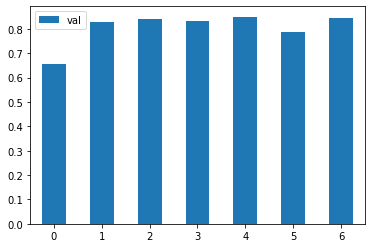

In [ ]:
dfpl = pd.DataFrame({'lab':['Naive Bayes', 'KNN', 'logreg', 'MLP', 'SVC', 'Decision Tree', 'Random Forest'], 'val':[ f1_score(y_test, nbayespr, average='weighted')
, f1_score( y_test, knnpr, average='weighted'),  f1_score( y_test, logregpr, average='weighted'),f1_score( y_test, mlppr, average='weighted'), 
 f1_score( y_test, svcpr,  average='weighted'), f1_score( y_test, dtreepr, average='weighted'), f1_score( y_test, rforpr, average='weighted') ]})
ax = dfpl.plot.bar( y='val', rot=0)



Βλέπω πως καλύτερη επίδοση έχω για το SVC μοντέλο.

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [ ]:
pr=clfsvc.predict(data_test)
dataframeid['RainTomorrow']=pr
print(dataframeid)

        id  RainTomorrow
0        1           0.0
1        2           0.0
2        3           0.0
3        4           0.0
4        5           0.0
...    ...           ...
9674  9675           0.0
9675  9676           0.0
9676  9677           0.0
9677  9678           0.0
9678  9679           0.0

[9679 rows x 2 columns]


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Pred_no_parameteres.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataframeid.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

Χρησιμοποιώ παραμέτρους που δεν αφορούν βάρη και περιορίζουν το overfitting.


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
#naive Bayes
params_NB = {'var_smoothing': np.logspace(0,-0.54, num=1000)}
gs_NB = HalvingGridSearchCV(estimator=nbc, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
[CV 1/5] END var_smoothing=0.530059135994645;, score=(train=0.944, test=0.667) total time=   0.0s
[CV 2/5] END var_smoothing=0.530059135994645;, score=(train=0.944, test=0.778) total time=   0.0s
[CV 3/5] END var_smoothing=0.530059135994645;, score=(train=0.917, test=1.000) total time=   0.0s
[CV 4/5] END var_smoothing=0.530059135994645;, score=(train=0.833, test=0.778) total time=   0.0s
[CV 5/5] END var_smoothing=0.530059135994645;, score=(train=1.000, test=0.889) total time=   0.0s
[CV 1/5] END var_smoothing=0.529399813273483;, score=(train=0.944, test=0.667) total time=   0.0s
[CV 2/5] END var_smoothing=0.529399813273483;, score=(train=0.944, test=0.778) total time=   0.0s
[CV 3/5] END var_smoothing=0.529399813273483;, score=(train=0.917, test=1.000) total time=   0.0s
[CV 4/5] END var_smoothing=0.529399813273483;, score=(train=0.833, test=0.778) total time=   0.0s
[CV 5/5] END var_smoothing=0.529399813273483;, score=(train=1.0

{'var_smoothing': 0.9597589310955497}

In [ ]:
#KNN
par_KNN = {'algorithm' : ['auto'], 'n_neighbors': [23 ,25, 27, 29 , 31, 33, 35]}
gs_KNN = HalvingGridSearchCV(estimator=knn, 
                 param_grid=par_KNN, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_KNN.fit(X_train, y_train)

gs_KNN.best_params_

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 11298
max_resources_: 33896
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 7
n_resources: 11298
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END algorithm=auto, n_neighbors=23;, score=(train=0.847, test=0.833) total time=   0.7s
[CV 2/5] END algorithm=auto, n_neighbors=23;, score=(train=0.845, test=0.831) total time=   0.7s
[CV 3/5] END algorithm=auto, n_neighbors=23;, score=(train=0.850, test=0.844) total time=   0.7s
[CV 4/5] END algorithm=auto, n_neighbors=23;, score=(train=0.846, test=0.830) total time=   1.0s
[CV 5/5] END algorithm=auto, n_neighbors=23;, score=(train=0.850, test=0.835) total time=   0.7s
[CV 1/5] END algorithm=auto, n_neighbors=25;, score=(train=0.846, test=0.834) total time=   0.7s
[CV 2/5] END algorithm=auto, n_neighbors=25;, score=(train=0.844, test=0.831) total time=   0.7s
[CV 3/5] END algorithm=auto, n_neighbors=25;, score=(trai

{'algorithm': 'auto', 'n_neighbors': 23}

In [ ]:
#logreg

par_ll = {'solver' : ['newton-cg', 'lbfgs' ,'liblinear', 'sag', 'saga'], 'random_state':[42], 'max_iter':[50, 125, 165, 205]}
gs_ll = HalvingGridSearchCV(estimator=logisticRegr, 
                 param_grid=par_ll, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_ll.fit(X_train, y_train)

gs_ll.best_params_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3766
max_resources_: 33896
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 3766
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_iter=50, random_state=42, solver=newton-cg;, score=(train=0.856, test=0.838) total time=   0.2s
[CV 2/5] END max_iter=50, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=50, random_state=42, solver=newton-cg;, score=(train=0.859, test=0.834) total time=   0.2s
[CV 4/5] END max_iter=50, random_state=42, solver=newton-cg;, score=(train=0.858, test=0.831) total time=   0.2s
[CV 5/5] END max_iter=50, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.834) total time=   0.2s
[CV 1/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.856, test=0.839) total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 2/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.859, test=0.833) total time=   0.1s
[CV 4/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.858, test=0.833) total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 5/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.834) total time=   0.1s
[CV 1/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.856, test=0.838) total time=   0.0s
[CV 2/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.849, test=0.829) total time=   0.0s
[CV 3/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.859, test=0.834) total time=   0.0s
[CV 4/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.858, test=0.831) total time=   0.0s
[CV 5/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.849, test=0.834) total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=50, random_state=42, solver=sag;, score=(train=0.856, test=0.838) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=50, random_state=42, solver=sag;, score=(train=0.849, test=0.829) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=50, random_state=42, solver=sag;, score=(train=0.859, test=0.833) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=50, random_state=42, solver=sag;, score=(train=0.858, test=0.831) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=50, random_state=42, solver=sag;, score=(train=0.849, test=0.834) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=50, random_state=42, solver=saga;, score=(train=0.856, test=0.838) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=50, random_state=42, solver=saga;, score=(train=0.849, test=0.827) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=50, random_state=42, solver=saga;, score=(train=0.859, test=0.833) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=50, random_state=42, solver=saga;, score=(train=0.857, test=0.833) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=50, random_state=42, solver=saga;, score=(train=0.849, test=0.834) total time=   0.3s
[CV 1/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.856, test=0.838) total time=   0.1s
[CV 2/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.859, test=0.834) total time=   0.1s
[CV 4/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.858, test=0.831) total time=   0.2s
[CV 5/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.834) total time=   0.2s
[CV 1/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.856, test=0.838) total time=   0.1s
[CV 2/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.859, test=0.834) total time=

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=125, random_state=42, solver=saga;, score=(train=0.856, test=0.838) total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=125, random_state=42, solver=saga;, score=(train=0.849, test=0.829) total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=125, random_state=42, solver=saga;, score=(train=0.859, test=0.833) total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=125, random_state=42, solver=saga;, score=(train=0.858, test=0.831) total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=125, random_state=42, solver=saga;, score=(train=0.849, test=0.834) total time=   0.6s
[CV 1/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.856, test=0.838) total time=   0.1s
[CV 2/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.829) total time=   0.2s
[CV 3/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.859, test=0.834) total time=   0.1s
[CV 4/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.858, test=0.831) total time=   0.2s
[CV 5/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.834) total time=   0.1s
[CV 1/5] END max_iter=165, random_state=42, solver=lbfgs;, score=(train=0.856, test=0.838) total time=   0.2s
[CV 2/5] END max_iter=165, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=165, random_state=42, solver=lbfgs;, score=(train=0.859, test=0.834) total time

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=165, random_state=42, solver=saga;, score=(train=0.859, test=0.834) total time=   0.8s
[CV 4/5] END max_iter=165, random_state=42, solver=saga;, score=(train=0.858, test=0.831) total time=   0.7s
[CV 5/5] END max_iter=165, random_state=42, solver=saga;, score=(train=0.849, test=0.834) total time=   0.7s
[CV 1/5] END max_iter=205, random_state=42, solver=newton-cg;, score=(train=0.856, test=0.838) total time=   0.1s
[CV 2/5] END max_iter=205, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.829) total time=   0.1s
[CV 3/5] END max_iter=205, random_state=42, solver=newton-cg;, score=(train=0.859, test=0.834) total time=   0.1s
[CV 4/5] END max_iter=205, random_state=42, solver=newton-cg;, score=(train=0.858, test=0.831) total time=   0.2s
[CV 5/5] END max_iter=205, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.834) total time=   0.1s
[CV 1/5] END max_iter=205, random_state=42, solver=lbfgs;, score=(train=0.856, test=0.838) total time= 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=205, random_state=42, solver=saga;, score=(train=0.859, test=0.834) total time=   1.0s
[CV 4/5] END max_iter=205, random_state=42, solver=saga;, score=(train=0.858, test=0.831) total time=   1.0s
[CV 5/5] END max_iter=205, random_state=42, solver=saga;, score=(train=0.849, test=0.834) total time=   1.1s
----------
iter: 1
n_candidates: 7
n_resources: 11298
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END max_iter=125, random_state=42, solver=liblinear;, score=(train=0.853, test=0.835) total time=   0.2s
[CV 2/5] END max_iter=125, random_state=42, solver=liblinear;, score=(train=0.851, test=0.843) total time=   0.1s
[CV 3/5] END max_iter=125, random_state=42, solver=liblinear;, score=(train=0.849, test=0.837) total time=   0.1s
[CV 4/5] END max_iter=125, random_state=42, solver=liblinear;, score=(train=0.847, test=0.840) total time=   0.4s
[CV 5/5] END max_iter=125, random_state=42, solver=liblinear;, score=(train=0.846, test=0.851) total ti

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.853, test=0.835) total time=   1.3s
[CV 2/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.851, test=0.843) total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.837) total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.847, test=0.840) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END max_iter=125, random_state=42, solver=lbfgs;, score=(train=0.846, test=0.851) total time=   0.5s
[CV 1/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.853, test=0.836) total time=   0.7s
[CV 2/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.851, test=0.843) total time=   0.7s
[CV 3/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.849, test=0.837) total time=   0.8s
[CV 4/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.847, test=0.840) total time=   0.7s
[CV 5/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.846, test=0.851) total time=   0.7s
[CV 1/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.853, test=0.835) total time=   0.1s
[CV 2/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.851, test=0.843) total time=   0.1s
[CV 3/5] END max_iter=50, random_state=42, solver=liblinear;, score=(train=0.849, test=0.837) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 2/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.852, test=0.842) total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.849, test=0.836) total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 4/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.847, test=0.839) total time=   0.2s
[CV 5/5] END max_iter=50, random_state=42, solver=lbfgs;, score=(train=0.846, test=0.850) total time=   0.2s
----------
iter: 2
n_candidates: 3
n_resources: 33894
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.848, test=0.844) total time=   2.3s
[CV 2/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.848, test=0.844) total time=   2.2s
[CV 3/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.846, test=0.849) total time=   2.2s
[CV 4/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.847, test=0.847) total time=   2.1s
[CV 5/5] END max_iter=125, random_state=42, solver=newton-cg;, score=(train=0.846, test=0.844) total time=   2.2s
[CV 1/5] END max_iter=165, random_state=42, solver=newton-cg;, score=(train=0.848, test=0.844) tot

{'max_iter': 125, 'random_state': 42, 'solver': 'newton-cg'}

bayes: var_smoothing: 0.4469616589303085

knn: 23



In [ ]:
#mlp
par_mlp = {'activation' : ['tanh', 'relu'], 'solver': ['sgd', 'adam', 'lbfgs' ], 'randomstate':[42], 'hidden_layer_sizes':([(50,), (75,), (100,), (125,) (150,), (175,), (200,), (225,)]), 'learning_rate':['constant', 'adaptive'], 'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
gs_mlp = HalvingGridSearchCV(estimator=clf, 
                 param_grid=par_mlp, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_mlp.fit(X_train, y_train)

gs_mlp.best_params_

In [ ]:
#SVC
par_svc = {'C' : [0.25, 0.5, 0.1, 1, 1.25, 1.5, 1.75, 2], 'gamma': [0.05 , 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], 'kernel':['rbf', 'sigmoid'], 'randomstate': [42]}
gs_svc = HalvingGridSearchCV(estimator=clfsvc, 
                 param_grid=par_svc, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_svc.fit(X_train, y_train)

gs_svc.best_params_

In [ ]:
par_dt = {'criterion' : ['gini', 'entropy'], 'splitter': ['best', 'random'], 'random_state':[42], 'max_depth':[1, 5, 10, 20]}
gs_dt= HalvingGridSearchCV(estimator=tree_clf, 
                 param_grid=par_dt, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_dt.fit(X_train, y_train)

gs_dt.best_params_

In [ ]:
par_rf = {'criterion' : ['gini', 'entropy'], 'bootstrap': [True, False], 'random_state':[42], 'n_estimators': [100, 125, 126, 128 ,129, 130, 132, 135, 137 ,138 , 139,141, 145, 147, 149,150], 'max_depth':[ 20, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 40, 43, 46, 48, 50 ] }
gs_rf = HalvingGridSearchCV(estimator=randomforest_clf, 
                 param_grid=par_rf, 
                 cv=5,   
                 verbose=3, 
                 scoring='accuracy') 
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=33, n_estimators=150, random_state=42;, score=(train=1.000, test=0.778) total time=   0.4s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=33, n_estimators=150, random_state=42;, score=(train=1.000, test=0.778) total time=   0.3s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=33, n_estimators=150, random_state=42;, score=(train=1.000, test=0.778) total time=   0.3s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=33, n_estimators=150, random_state=42;, score=(train=1.000, test=0.889) total time=   0.4s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=33, n_estimators=150, random_state=42;, score=(train=1.000, test=0.667) total time=   0.3s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=34, n_estimators=100, random_state=42;, score=(train=1.000, test=0.778) total time=   0.2s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=34, n_e

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 25,
 'n_estimators': 138,
 'random_state': 42}


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


Μετά από δοκιμές καταλήγω στις παρακάτω παραμέτρους.

In [ ]:
#naive bayes
nbc = GaussianNB(var_smoothing=0.9188470878618735)
nbc.fit(X_train, y_train)
nbayespr = nbc.predict(X_test)
mislabel = np.sum((y_test!=nbayespr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2595


In [ ]:
#knn
# Initialize classifier:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=23) 

# Train the classifier:
knn.fit(X_train, y_train) 
#knn
# Make predictions with the classifier:
knnpr = knn.predict(X_test)

print("Labels' prediction ",knnpr)

print("Labels from test set",y_test)
mislabel = np.sum((y_test!=knnpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Labels' prediction  [0. 0. 1. ... 0. 0. 0.]
Labels from test set 26834    0.0
4280     1.0
32228    1.0
46210    0.0
34892    1.0
        ... 
36715    1.0
24586    0.0
41744    0.0
1904     0.0
11635    1.0
Name: 105, Length: 14527, dtype: float64
Total number of mislabelled data points from 14527 test samples is 2227


In [ ]:
#logistic regression
logisticRegr = LogisticRegression(solver='saga', random_state=42 , max_iter=184)
logisticRegr.fit(X_train, y_train)
logregpr = logisticRegr.predict(X_test)
mislabel = np.sum((y_test!=logregpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))


Total number of mislabelled data points from 14527 test samples is 2196


In [ ]:

#mlp
clf = MLPClassifier(activation='relu', solver='sgd', random_state=42, hidden_layer_sizes=225, learning_rate='constant')
mlppr=clf.fit(X_train, y_train)
#mlp
 
mlppr=clf.predict(X_test)
mislabel = np.sum((y_test!=mlppr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2082


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
clfsvc=SVC(C=1.77, gamma=0.03 , kernel='rbf' )
clfsvc.fit(X_train, y_train)
#svc
svcpr=clfsvc.predict(X_test)
mislabel = np.sum((y_test!=svcpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2071


In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42, max_depth=6 )
tree_clf_fit=tree_clf.fit(X_train, y_train)
dtreepr=tree_clf.predict(X_test)
mislabel = np.sum((y_test!=dtreepr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 14527 test samples is 2376


In [ ]:
randomforest_clf = RandomForestClassifier(criterion='gini', bootstrap=False, random_state=42,max_depth=38)
randomforest_clf.fit(X_train, y_train)
rforpr=randomforest_clf.predict(X_test)
mislabel = np.sum((y_test!=rforpr))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))


Total number of mislabelled data points from 14527 test samples is 2102


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


Naive Bayes:  0.6550781042085286
KNN:  0.8294398137904946
logreg:  0.8399648511916479
MLP:  0.8356345206422016
SVC  0.8518145167653579
Decision Tree:  0.7897662521044254
Random Forest:  0.8456754505228999


Naive Bayes:  0.47046228710462284
KNN:  0.5936248040411078
logreg:  0.620045006058508
MLP:  0.6049885016805236
SVC  0.6412049488972567
Decision Tree:  0.5454275534441806
Random Forest:  0.6254951386388189


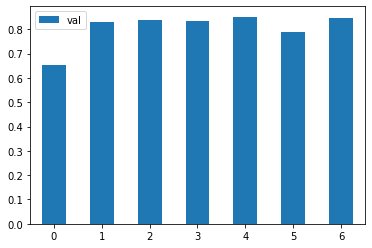

In [ ]:

#naive bayes
print("Naive Bayes: ", f1_score(y_test, nbayespr, average='weighted'))
print("KNN: ", f1_score( y_test, knnpr, average='weighted'))
print("logreg: ", f1_score( y_test, logregpr, average='weighted'))
print("MLP: ", f1_score( y_test, mlppr, average='weighted'))
print("SVC ", f1_score( y_test, svcpr,  average='weighted'))
print("Decision Tree: ", f1_score( y_test, dtreepr, average='weighted'))
print("Random Forest: ", f1_score( y_test, rforpr, average='weighted'))
print('\n')
print("Naive Bayes: ", f1_score(y_test, nbayespr))
print("KNN: ", f1_score( y_test, knnpr))
print("logreg: ", f1_score( y_test, logregpr))
print("MLP: ", f1_score( y_test, mlppr))
print("SVC ", f1_score( y_test, svcpr ))
print("Decision Tree: ", f1_score( y_test, dtreepr))
print("Random Forest: ", f1_score( y_test, rforpr))

dfpl = pd.DataFrame({'lab':['Naive Bayes', 'KNN', 'logreg', 'MLP', 'SVC', 'Decision Tree', 'Random Forest'], 'val':[ f1_score(y_test, nbayespr, average='weighted')
, f1_score( y_test, knnpr, average='weighted'),  f1_score( y_test, logregpr, average='weighted'),f1_score( y_test, mlppr, average='weighted'), 
 f1_score( y_test, svcpr,  average='weighted'), f1_score( y_test, dtreepr, average='weighted'), f1_score( y_test, rforpr, average='weighted') ]})
ax = dfpl.plot.bar( y='val', rot=0)




Βάσει του διαγράμματος βλέπω πως καλύτερο εινια το svc αλλά υποβάλλοντας στο kaggle καλύτερα αποτελέσματα παίρνω με το mlp.

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [ ]:
pr=clf.predict(data_test)
dataframeid['RainTomorrow']=pr
print(dataframeid)

        id  RainTomorrow
0        1           0.0
1        2           0.0
2        3           0.0
3        4           0.0
4        5           0.0
...    ...           ...
9674  9675           0.0
9675  9676           0.0
9676  9677           0.0
9677  9678           0.0
9678  9679           0.0

[9679 rows x 2 columns]


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Pred_parameteresmlp3.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataframeid.to_csv(f)



pr=clfsvc.predict(data_test)
dataframeid['RainTomorrow']=pr
print(dataframeid)
drive.mount('/content/drive')
path = '/content/drive/My Drive/Pred_parameteressvc3.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataframeid.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        id  RainTomorrow
0        1           0.0
1        2           0.0
2        3           0.0
3        4           0.0
4        5           0.0
...    ...           ...
9674  9675           0.0
9675  9676           0.0
9676  9677           0.0
9677  9678           0.0
9678  9679           0.0

[9679 rows x 2 columns]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
